In [11]:
#Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

#Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

Training Data:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Validation Data:
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks 

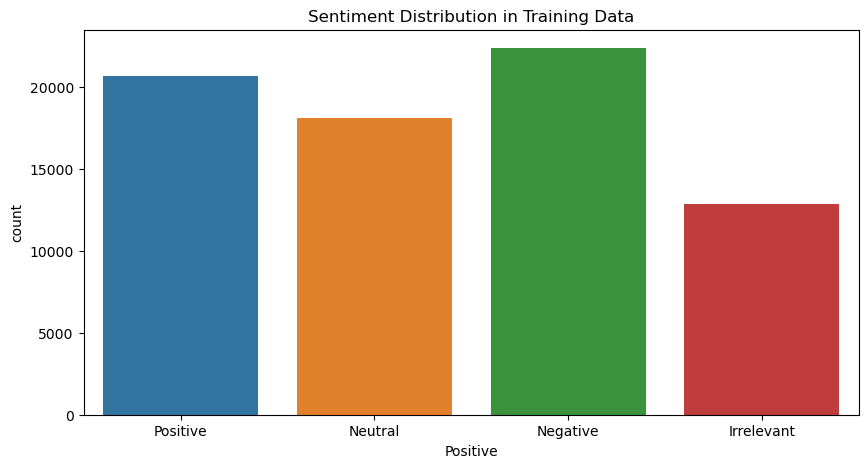

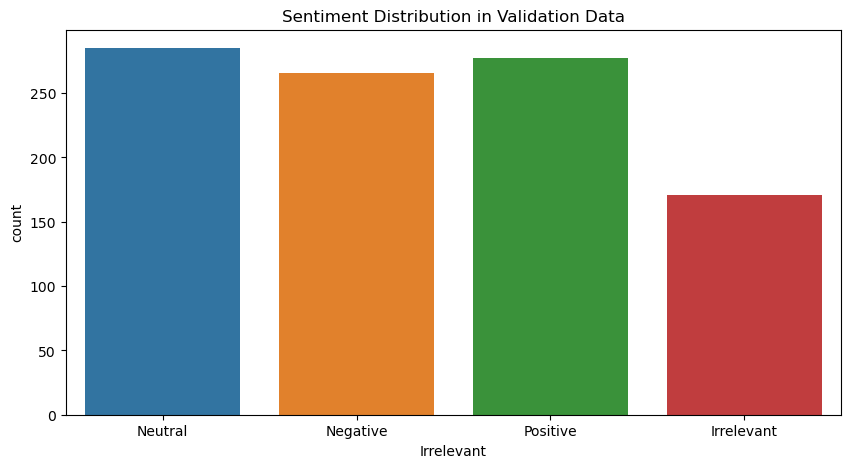

C:\Users\cheek\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


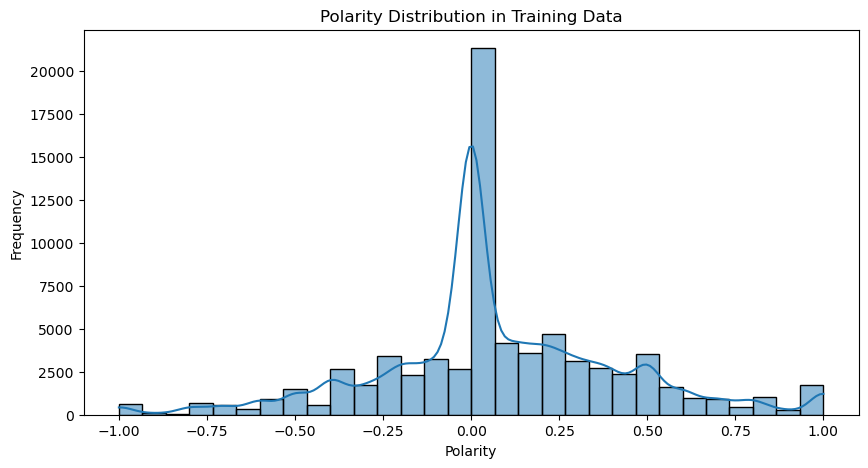

C:\Users\cheek\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


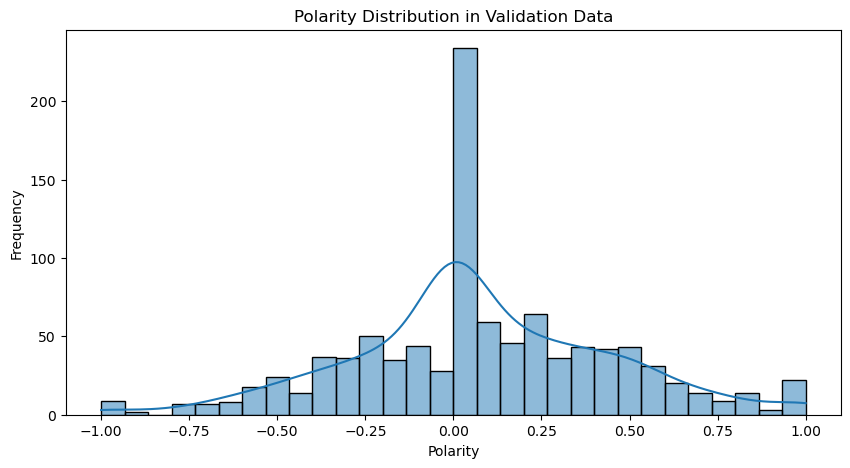

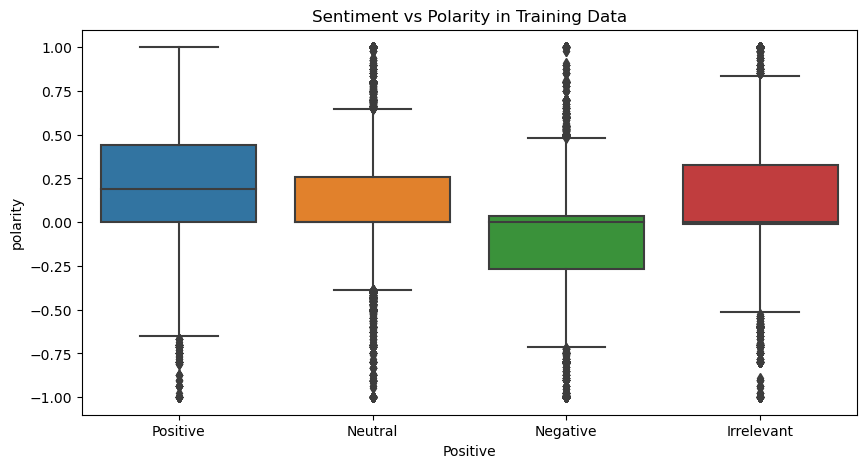

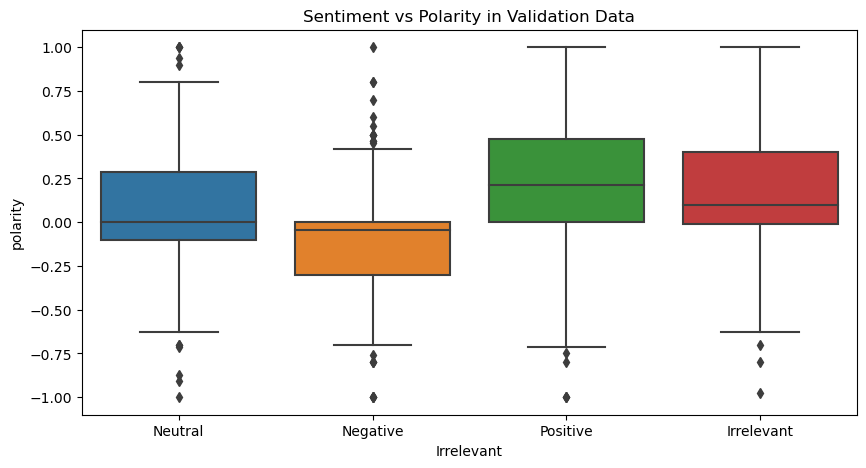

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


df_train = pd.read_csv("twitter_training.csv")
df_val = pd.read_csv("twitter_validation.csv")


print("Training Data:")
print(df_train.head())

print("\nValidation Data:")
print(df_val.head())


print("Training Data Columns:")
print(df_train.columns)

print("\nValidation Data Columns:")
print(df_val.columns)


sentiment_column_train = df_train.columns[2]
text_column_train = df_train.columns[3]
sentiment_column_val = df_val.columns[2]
text_column_val = df_val.columns[3]


print("\nMissing values in training data:")
print(df_train.isnull().sum())

print("\nMissing values in validation data:")
print(df_val.isnull().sum())


df_train.dropna(inplace=True)
df_val.dropna(inplace=True)


print("\nSentiment distribution in training data:")
print(df_train[sentiment_column_train].value_counts())

print("\nSentiment distribution in validation data:")
print(df_val[sentiment_column_val].value_counts())


plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x=sentiment_column_train)
plt.title('Sentiment Distribution in Training Data')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_val, x=sentiment_column_val)
plt.title('Sentiment Distribution in Validation Data')
plt.show()


def get_polarity(text):
    return TextBlob(text).sentiment.polarity


df_train['polarity'] = df_train[text_column_train].apply(get_polarity)
df_val['polarity'] = df_val[text_column_val].apply(get_polarity)


plt.figure(figsize=(10, 5))
sns.histplot(df_train['polarity'], bins=30, kde=True)
plt.title('Polarity Distribution in Training Data')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df_val['polarity'], bins=30, kde=True)
plt.title('Polarity Distribution in Validation Data')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(data=df_train, x=sentiment_column_train, y='polarity')
plt.title('Sentiment vs Polarity in Training Data')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_val, x=sentiment_column_val, y='polarity')
plt.title('Sentiment vs Polarity in Validation Data')
plt.show()
